In [1]:
# Code putting it all together - find polymorphic sites covered

In [3]:
!pip install ipynb --user

In [5]:
from ipynb.fs.full.SNP_matrix import read_fasta

Differences in the 2 genome sequences:  244
Differences in the 2 genome sequences:  244
Differences in the 2 genome sequences:  257
Differences in the 2 genome sequences:  230
Differences in the 2 genome sequences:  250
1225
6 1225
For the SNP matrix, number of polymorphic sites:  1225


In [6]:
ind_1 = read_fasta('Ind_seq/ind1.fa')
ind_2 = read_fasta('Ind_seq/ind2.fa')
ind_3 = read_fasta('Ind_seq/ind3.fa')
ind_4 = read_fasta('Ind_seq/ind4.fa')
ind_5 = read_fasta('Ind_seq/ind5.fa')

In [7]:
from Bio import SeqIO

input_file = 'Priacma_serrata.fa'
fasta_sequences = SeqIO.parse(open(input_file), 'fasta')
bp = 0 # base pairs
ref_genome = ""

for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    bp += len(sequence)
    ref_genome += sequence

len(ref_genome)

9520930

In [8]:
# Function to generate list of indices for mutations
def mut_ind(ind, ref_genome):
    mut = []
    for i in range(len(ind)):
        if ind[i] != ref_genome[i]:
            mut.append(i)
    
    return mut

In [9]:
mut_1 = mut_ind(ind_1, ref_genome)
len(mut_1)

244

In [10]:
mut_2 = mut_ind(ind_2, ref_genome)
mut_3 = mut_ind(ind_3, ref_genome)
mut_4 = mut_ind(ind_4, ref_genome)
mut_5 = mut_ind(ind_5, ref_genome)

In [11]:
# Read position file
def read_pos(file):
    pos_ = []
    f = open(file, 'r')
    for line in f.readlines():
        line = line.strip().split('\t')
        temp = []
        temp.append(int(line[0]))
        temp.append(int(line[1]))
        pos_.append(temp)
    
    return pos_

In [12]:
pos_1 = read_pos('Positions/pos.txt')
len(pos_1)

680065

In [13]:
pos_2 = read_pos('Positions/pos_2.txt')
pos_3 = read_pos('Positions/pos_3.txt')
pos_4 = read_pos('Positions/pos_4.txt')
pos_5 = read_pos('Positions/pos_5.txt')

In [15]:
# Function to find how many indices in mut(original SNP matrix) are covered in pos(genome skim data)
def compute_cov(mut, pos_):
    covered = 0
    for i in range(len(pos_)):
        beg = pos_[i][0]
        end = pos_[i][1]
        for j in range(len(mut)):
            current = mut[j]
            if(current >= beg and current < end):
                # print(current, " is in range\n")
                mut[j] = -1 # set value unusable for next iteration
                covered += 1

    print("Polymorphic sites covered: ", covered, " | Total mutations: ", len(mut))

In [16]:
compute_cov(mut_1, pos_1)

Polymorphic sites covered:  50  | Total mutations:  244


In [17]:
compute_cov(mut_2, pos_2)

Polymorphic sites covered:  71  | Total mutations:  244


In [18]:
compute_cov(mut_3, pos_3)

Polymorphic sites covered:  61  | Total mutations:  257


In [19]:
compute_cov(mut_4, pos_4)

Polymorphic sites covered:  58  | Total mutations:  230


In [20]:
compute_cov(mut_5, pos_5)

Polymorphic sites covered:  72  | Total mutations:  250


In [21]:
# Generate graph
covered = [50, 71, 61, 58, 72]
total = [244, 244, 257, 230, 250]
ratios = []

for i in range(5):
    ratios.append(covered[i]/total[i])

print(ratios)

[0.20491803278688525, 0.29098360655737704, 0.23735408560311283, 0.25217391304347825, 0.288]


In [22]:
overall = sum(covered)/sum(total)
overall

0.2546938775510204

In [23]:
names = ['ind1', 'ind2', 'ind3', 'ind4', 'ind5']
combined = [overall] * 5

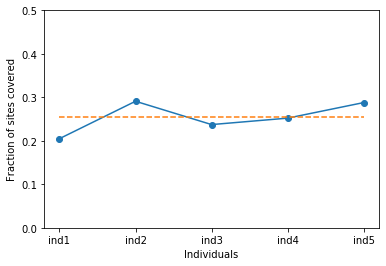

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(names, ratios, marker = 'o')
plt.plot(names, combined, linestyle = '--')
plt.ylim([0., 0.5])
plt.xlabel('Individuals')
plt.ylabel('Fraction of sites covered')
plt.show()